In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
%matplotlib inline


### 1. 
Load the Iris dataset from http://archive.ics.uci.edu/ml/datasets/Iris

The actual data is in the url:http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
*      Iris Setosa
*      Iris Versicolour
*      Iris Virginica

In [3]:
#store the url in the variable name url
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
#Load the iris data and give proper header
iris_data = pd.read_csv(url, names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. 
Calculate the mean, median and standard deviation for all attributes of Iris setosa.

In [5]:
# mean
iris_data.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [6]:
# median
iris_data.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [7]:
#standard deviation
iris_data.std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

### 3. 
Select one attribute for species Iris setosa.

In [8]:
#select only rows where iris_data's class is "Iris-setosa"
iris_setosa = iris_data[iris_data["class"] == "Iris-setosa"]
#we have 50 class indicating only Iris-setosa
iris_setosa["class"].count()

50

In [9]:
#select the sepal lenght from the filtered iris data (iris_setosa)
iris_setosa_sep_len = iris_setosa["sepal_length"]
iris_setosa_sep_len.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

* Next

Plot four histograms of the attribute using the methods intoduced in the lectures (Sturges, Scott, Square root, and Freedman-Diaconis) to determine the number of bins

(array([ 5.,  6.,  9., 16.,  4.,  7.,  3.]),
 array([4.3       , 4.51428571, 4.72857143, 4.94285714, 5.15714286,
        5.37142857, 5.58571429, 5.8       ]),
 <a list of 7 Patch objects>)

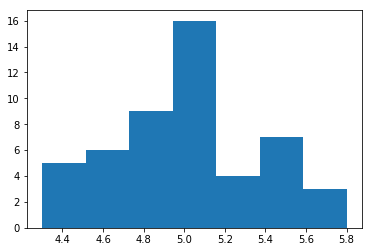

In [10]:
plt.hist(iris_setosa_sep_len, bins = "sturges")

(array([ 5., 11., 20.,  9.,  5.]),
 array([4.3, 4.6, 4.9, 5.2, 5.5, 5.8]),
 <a list of 5 Patch objects>)

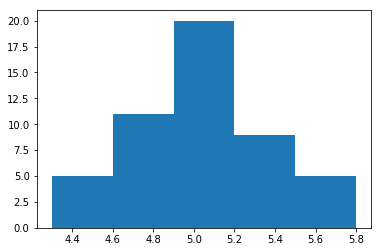

In [11]:
plt.hist(iris_setosa_sep_len, bins = "scott")

(array([ 4.,  5.,  7., 12., 11.,  6.,  2.,  3.]),
 array([4.3   , 4.4875, 4.675 , 4.8625, 5.05  , 5.2375, 5.425 , 5.6125,
        5.8   ]),
 <a list of 8 Patch objects>)

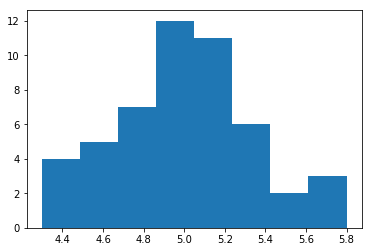

In [12]:
#Square root
plt.hist(iris_setosa_sep_len, bins = "sqrt")

(array([ 5.,  6.,  9., 16.,  4.,  7.,  3.]),
 array([4.3       , 4.51428571, 4.72857143, 4.94285714, 5.15714286,
        5.37142857, 5.58571429, 5.8       ]),
 <a list of 7 Patch objects>)

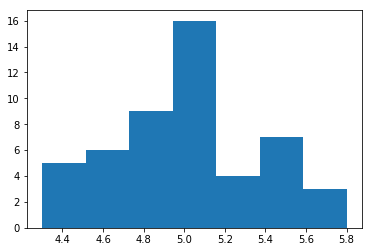

In [13]:
#freedman
plt.hist(iris_setosa_sep_len, bins = "fd")

In [14]:
iris_setosa_sep_len.describe()

count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal_length, dtype: float64

**All above histogram seem normally distributed. Most Iris setosa have sepal length between 4.8cm and 5.2cm Meanwhile, both sturges and fd has the similar of distribution.**


Next we would like to see if the distributions of the values for different flower species vary in some way.
Plot histograms of your attribute for Iris virginica and Iris versicolor. Do these histograms give any indication
about the feasibility or infeasibility of classifying the flower species?

Iris-versicolor

In [15]:
#select only rows where iris_data's class is "Iris-versicolor"
iris_versicolor = iris_data[iris_data["class"] == "Iris-versicolor"]
#we have 50 class indicating only Iris-versicolor
iris_versicolor["class"].count()

50

In [16]:
#select the sepal lenght from the filtered iris data (iris_versicolor)
iris_versicolor_sep_len = iris_versicolor["sepal_length"]
iris_versicolor_sep_len.head()

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
Name: sepal_length, dtype: float64

 Plot histograms

(array([ 4.,  2., 15.,  9.,  9.,  5.,  6.]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <a list of 7 Patch objects>)

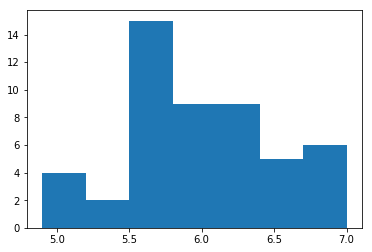

In [17]:
plt.hist(iris_versicolor_sep_len, bins = "sturges")

(array([ 5., 16., 13.,  8.,  8.]),
 array([4.9 , 5.32, 5.74, 6.16, 6.58, 7.  ]),
 <a list of 5 Patch objects>)

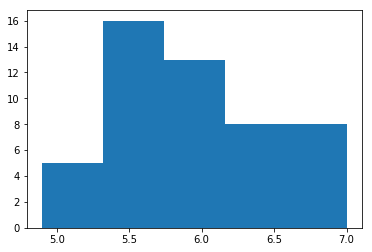

In [18]:
plt.hist(iris_versicolor_sep_len, bins = "scott")

(array([ 4.,  2., 10., 10., 10.,  5.,  6.,  3.]),
 array([4.9   , 5.1625, 5.425 , 5.6875, 5.95  , 6.2125, 6.475 , 6.7375,
        7.    ]),
 <a list of 8 Patch objects>)

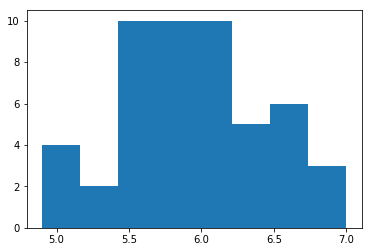

In [19]:
plt.hist(iris_versicolor_sep_len, bins = "sqrt")

(array([ 5., 11., 10., 10.,  8.,  6.]),
 array([4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <a list of 6 Patch objects>)

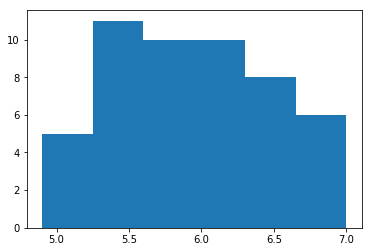

In [20]:
plt.hist(iris_versicolor_sep_len, bins = "fd")

Iris-virginica

In [21]:
iris_versicolor_sep_len.describe()

count    50.000000
mean      5.936000
std       0.516171
min       4.900000
25%       5.600000
50%       5.900000
75%       6.300000
max       7.000000
Name: sepal_length, dtype: float64

In [22]:
#select only rows where iris_data's class is "Iris-virginica"
iris_virginica = iris_data[iris_data["class"] == "Iris-virginica"]
#we have 50 class indicating only Iris-virginica
iris_virginica["class"].count()

50

In [23]:
#select the sepal lenght from the filtered iris data (iris_virginica)
iris_virginica_sep_len = iris_virginica["sepal_length"]
iris_virginica_sep_len.head()

100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
Name: sepal_length, dtype: float64

 Plot histograms

(array([ 1.,  2.,  8., 17., 10.,  6.,  6.]),
 array([4.9       , 5.32857143, 5.75714286, 6.18571429, 6.61428571,
        7.04285714, 7.47142857, 7.9       ]),
 <a list of 7 Patch objects>)

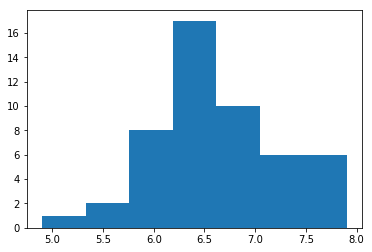

In [24]:
plt.hist(iris_virginica_sep_len, bins = "sturges")

(array([ 1.,  5., 13., 16.,  8.,  7.]),
 array([4.9, 5.4, 5.9, 6.4, 6.9, 7.4, 7.9]),
 <a list of 6 Patch objects>)

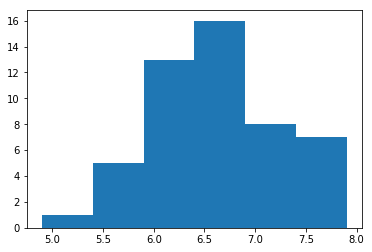

In [25]:
plt.hist(iris_virginica_sep_len, bins = "scott")

(array([ 1.,  1.,  7., 10., 14.,  6.,  5.,  6.]),
 array([4.9  , 5.275, 5.65 , 6.025, 6.4  , 6.775, 7.15 , 7.525, 7.9  ]),
 <a list of 8 Patch objects>)

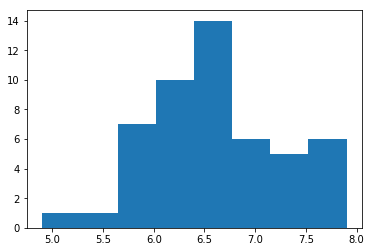

In [26]:
plt.hist(iris_virginica_sep_len, bins = "sqrt")

(array([ 1.,  0.,  5.,  7., 15.,  7.,  7.,  2.,  6.]),
 array([4.9       , 5.23333333, 5.56666667, 5.9       , 6.23333333,
        6.56666667, 6.9       , 7.23333333, 7.56666667, 7.9       ]),
 <a list of 9 Patch objects>)

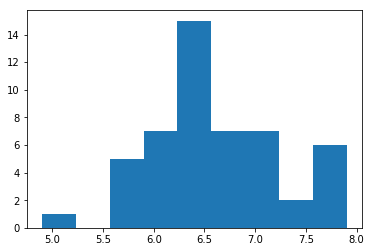

In [27]:
plt.hist(iris_virginica_sep_len, bins = "fd")

In [28]:
iris_virginica_sep_len.describe()

count    50.00000
mean      6.58800
std       0.63588
min       4.90000
25%       6.22500
50%       6.50000
75%       6.90000
max       7.90000
Name: sepal_length, dtype: float64

*Iris setosa have sepal length between 4.3cm and 5.8cm. Most Iris setosa have sepal length between 4.8cm and 5.2cm
Iris versicolor have sepal length between 4.9cm and 7cm. Most Iris versicolor have sepal length between 5.6cm and 6.3cm
Iris virginica have sepal length between 4.9cm and 7.9cm. Most Iris virginica have sepal length between 6.2cm and 6.9cm*

*Using the sepal length as the explanatory variable, there is a clear distinction between most Iris setosa, Iris versicolor and Iris virginica. Hence, there is a feasibility of classifying the flower species using the above histograms.*

### 4. 
Produce boxplot plots of attributes. Can you see any outliers?

In [29]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


{'whiskers': [<matplotlib.lines.Line2D at 0x1fc9e31ddd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc9e326668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc9e31d860>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc9e326eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc9e326f98>],
 'means': []}

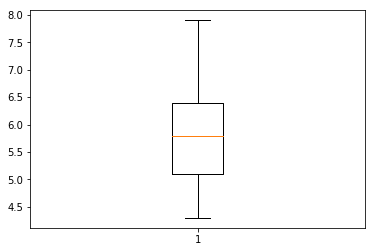

In [30]:
plt.boxplot(iris_data["sepal_length"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc9e383940>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc9e383e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc9e383400>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc9e38aa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc9e38ae48>],
 'means': []}

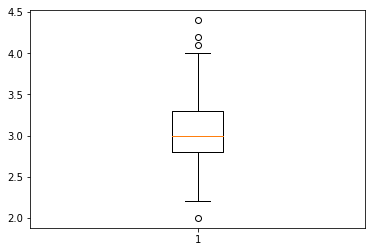

In [31]:
plt.boxplot(iris_data["sepal_width"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc9e3d9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc9e3e2748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc9e3d9940>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc9e3e2f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc9e3e9400>],
 'means': []}

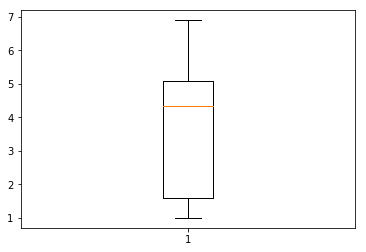

In [32]:
plt.boxplot(iris_data["petal_length"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc9e430f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc9e43abe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc9e430e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc9e443470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc9e443898>],
 'means': []}

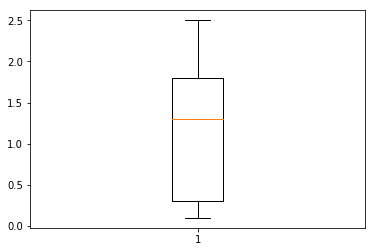

In [33]:
plt.boxplot(iris_data["petal_width"])

There is seems to be high and low outliers in the sepal width. Other attributes have noticeable outliers.

### 5. 
Calculate Pearson’s correlation tables for the attributes. These numbers may give us some indication
about simple (linear) relationships between features. Calculate also Spearman’s rho and Kendall’s tau
values. What is the purpose of these values?
* What features correlate linearly with each other?
* Does this exclude any other sort of correlation?

Produce scatter plots of interesting features. 

In [34]:
#store all numerical attributes as iris_data_num
iris_data_num = iris_data.iloc[: , :-1]
iris_data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
#Calculate Pearson’s correlation tables for the attributes
iris_data_num.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [36]:
#Spearman’s rho
iris_data_num.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.159457,0.881386,0.834421
sepal_width,-0.159457,1.000000,-0.303421,-0.277511
petal_length,0.881386,-0.303421,1.000000,0.936003
petal_width,0.834421,-0.277511,0.936003,1.000000


In [37]:
#Kendall’s tau values
iris_data_num.corr(method='kendall')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.072112,0.717624,0.654960
sepal_width,-0.072112,1.000000,-0.182391,-0.146988
petal_length,0.717624,-0.182391,1.000000,0.803014
petal_width,0.654960,-0.146988,0.803014,1.000000


Correlation coefficients help to determine the linear relationship between numerical attributes. The correlation coefficient ranges from -1 to 1. A negative correlation coefficient indicates a negative relationship between attributes and vice versa. The relationship is strong if the **absolute** value of the correlation coefficient is close 1.

Using the result of all three correlation 
* sepal_length and petal_length have strong positive correlation
* sepal_length and petal_width have strong positive correlation
* petal_length and petal_width have strong positive correlation

Produce scatter plots of interesting features.

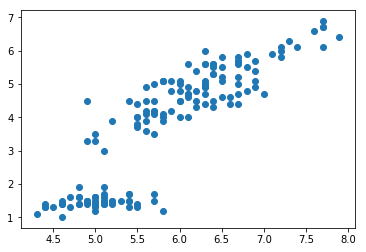

In [38]:
plt.scatter(iris_data["sepal_length"], iris_data["petal_length"])

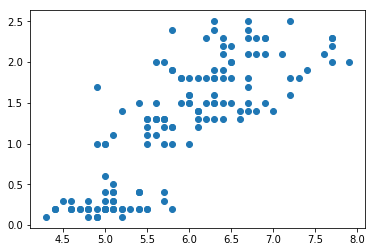

In [39]:
plt.scatter(iris_data["sepal_length"], iris_data["petal_width"])

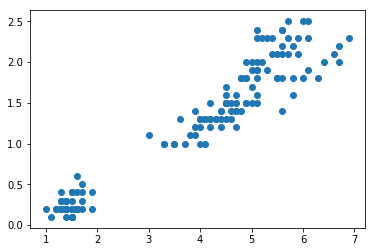

In [40]:
plt.scatter(iris_data["petal_length"], iris_data["petal_width"])

### 6. 
Principal component analysis (PCA) with and without z-score normalization: project the data to the first
two principal components. Visualize the result as a scatter plot. What is the proportion of variance
explained in projections? What can be observed?

### Principal component analysis (PCA) without z-score normalization

In [41]:
#iris_data numerical values as 
x = iris_data.iloc[: , :-1].values
x[:4, :4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [42]:
y = iris_data.loc[: , ['class']].values
y[:4]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

#### project the data to the first two principal components

In [43]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [44]:
finalDf = pd.concat([principalDf, iris_data[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


#### Visualize the result as a scatter plot

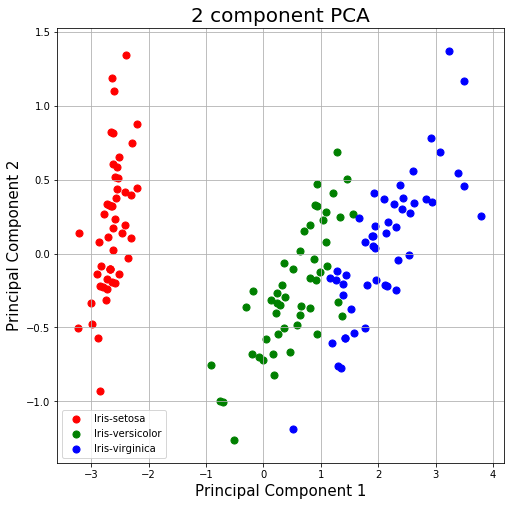

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

 #### What is the proportion of variance explained in projections?

In [46]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [47]:
#PCA1 +PCA2
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9776317750248034

 #### What can be observed?

 The first principal component contains 92.46% of the variance and the second principal component contains 5.3% of the variance. Together, the two components contain 97.76% of the information.

### Principal component analysis (PCA)  with z-score normalization

In [48]:
# standardize the iris_data numerical 
x_z = StandardScaler().fit_transform(x)
x_z[:4, :4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

#### project the data to the first two principal components

In [49]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_z)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [50]:
finalDf = pd.concat([principalDf, iris_data[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


#### Visualize the result as a scatter plot

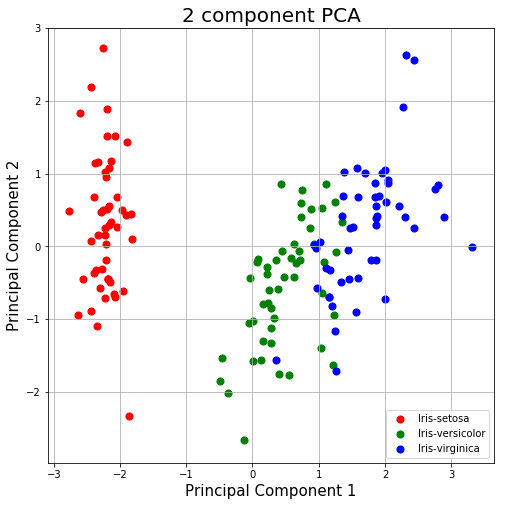

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

 #### What is the proportion of variance explained in projections?

In [52]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [53]:
#PCA1 +PCA2
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9580097536148199

 #### What can be observed?

The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

**Multidimensional scaling (MDS):**  is a technique that creates a map displaying the relative positions of a number of
objects, given only a table of the distances between them. The map may consist of one or more
dimensions. The program calculates either the metric or the non-metric solution. The table of distances is known as
the proximity matrix. It arises either directly from experiments or indirectly as a correlation matrix. 

### Modern Multidimensional Scaling without z-score normalization

#### project the data to the first two mds components

In [54]:
mds = MDS(n_components=2)
mdsComponents = mds.fit_transform(x)
mdsDf = pd.DataFrame(data = mdsComponents
             , columns = ['mds Coordinate 1', 'mds Coordinate 2'])
mdsDf.head()

,mds Coordinate 1,mds Coordinate 2
0,-1.972292,1.865003
1,-1.576357,2.233016
2,-1.750882,2.319901
3,-1.497800,2.335157
4,-2.025126,1.883859


In [55]:
final_mds_Df = pd.concat([mdsDf, iris_data[['class']]], axis = 1)
final_mds_Df.head()

,mds Coordinate 1,mds Coordinate 2,class
0,-1.972292,1.865003,Iris-setosa
1,-1.576357,2.233016,Iris-setosa
2,-1.750882,2.319901,Iris-setosa
3,-1.497800,2.335157,Iris-setosa
4,-2.025126,1.883859,Iris-setosa


#### Visualize the result as a scatter plot

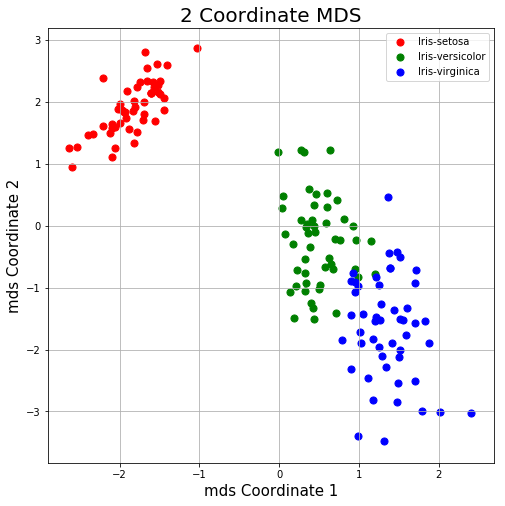

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('mds Coordinate 1', fontsize = 15)
ax.set_ylabel('mds Coordinate 2', fontsize = 15)
ax.set_title('2 Coordinate MDS', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_mds_Df['class'] == target
    ax.scatter(final_mds_Df.loc[indicesToKeep, 'mds Coordinate 1']
               , final_mds_Df.loc[indicesToKeep, 'mds Coordinate 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Modern Multidimensional Scaling with z-score normalization

#### project the data to the first two mds components

In [57]:
mds = MDS(n_components=2)
mdsComponents = mds.fit_transform(x_z)
mdsDf = pd.DataFrame(data = mdsComponents
             , columns = ['mds Coordinate 1', 'mds Coordinate 2'])
mdsDf.head()

,mds Coordinate 1,mds Coordinate 2
0,-1.228993,1.984963
1,-0.046594,2.200813
2,-0.480283,2.356053
3,-0.205636,2.388883
4,-1.427809,2.051443


In [58]:
final_mds_Df = pd.concat([mdsDf, iris_data[['class']]], axis = 1)
final_mds_Df.head()

,mds Coordinate 1,mds Coordinate 2,class
0,-1.228993,1.984963,Iris-setosa
1,-0.046594,2.200813,Iris-setosa
2,-0.480283,2.356053,Iris-setosa
3,-0.205636,2.388883,Iris-setosa
4,-1.427809,2.051443,Iris-setosa


#### Visualize the result as a scatter plot

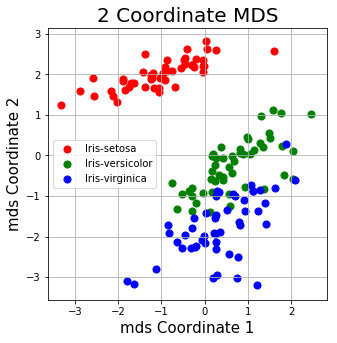

In [59]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('mds Coordinate 1', fontsize = 15)
ax.set_ylabel('mds Coordinate 2', fontsize = 15)
ax.set_title('2 Coordinate MDS', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_mds_Df['class'] == target
    ax.scatter(final_mds_Df.loc[indicesToKeep, 'mds Coordinate 1']
               , final_mds_Df.loc[indicesToKeep, 'mds Coordinate 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()